In [ ]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import keras as keras
from random import Random
from sklearn.preprocessing import Normalizer
from time import time
from numpy import asarray
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
#import sklearn as sklearn
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MaxAbsScaler

In [ ]:

#load data
#https://www.kaggle.com/jakeshbohaju/brain-tumor

rand = Random()
dataset = loadtxt("/content/ia-rna/brain-tumor.csv", delimiter=',', skiprows=1, usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13))


In [ ]:
X = dataset[:,1:13]
y = dataset[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)


#Normalização
X = (X-np.min(X)/(np.max(X)-np.min(X)))

print(X.shape)
print(y.shape)

(3762, 12)
(3762,)


In [ ]:
#define model l


model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(keras.layers.Dropout(0.2, seed=rand.seed(int(time()))))
model.add(Dense(33, activation='sigmoid'))
model.add(Dense(11, activation='relu'))
model.add(keras.layers.Dropout(0.1, seed=rand.seed(int(time()))))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compute model

model.compile(loss='binary_crossentropy', optimizer='adamax',  metrics=['accuracy'])

In [ ]:
#fit model
history = model.fit(X_train, y_train, epochs=1000, batch_size=256, validation_data=(X_test, y_test))
print(history.history.keys())


Epoch 1/1000
10/10 [==============================] - 4s 21ms/step - loss: 0.8667 - accuracy: 0.4631 - val_loss: 0.7038 - val_accuracy: 0.4364
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7243 - accuracy: 0.4833 - val_loss: 0.6811 - val_accuracy: 0.5725
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.5238 - val_loss: 0.6765 - val_accuracy: 0.5725
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.5302 - val_loss: 0.6730 - val_accuracy: 0.5700
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5401 - val_loss: 0.6696 - val_accuracy: 0.5700
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5341 - val_loss: 0.6701 - val_accuracy: 0.5709
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.5464 - val_loss: 0.6716 - val_accuracy: 0.5709
Epoch

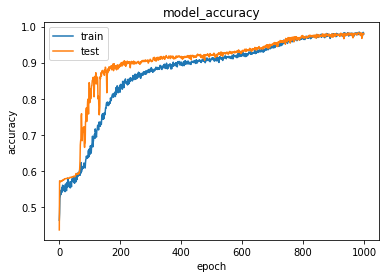

In [ ]:
#   desempenho da acuracia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

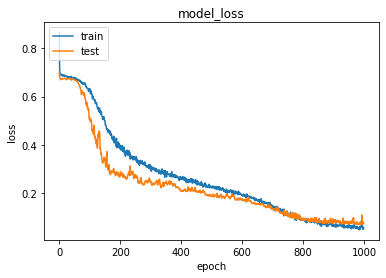

In [ ]:
#   desempenho do loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

_, accuracy = model.evaluate(X_test, y_test)

pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, pred)

#print(pred)
print("acuracia = %.2f " % (accuracy * 100))

39/39 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9807
acuracia = 98.07 


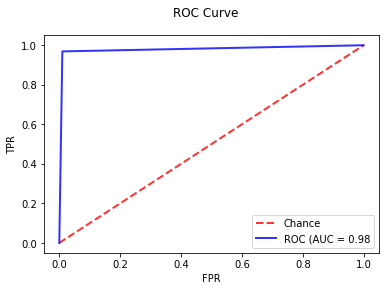

In [ ]:
#   AUC / ÁREA ABAIXO DA CURVA 

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
auc = metrics.auc(fpr, tpr)

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.plot(fpr, tpr, color='b', label=r'ROC (AUC = %0.2f' % (auc), lw=2, alpha=.8)
plt.suptitle("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

In [ ]:
#   MATRIZ DE CONFUSÃO

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

#True Positive Rate(TPR): True Positive/positive
tpr = tp / (tp + fn) 

#True Negative Rate(TNR): True Negative/Negative
tnr = tn / (tn + fp) 
acc = (tp + tn) / (tp + tn + fp + fn)

print("TPR = ", tpr)
print("TNR = ", tnr)
print("ACC = ", acc)
print(cm)


TPR =  0.9688644688644689
TNR =  0.9899425287356322
ACC =  0.9806763285024155
[[689   7]
 [ 17 529]]
